<a href="https://colab.research.google.com/github/TKLUSSMANN/ENewsExpress/blob/main/Klussmann_ENewsExpress_BusinessStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.



### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users? 

# Data Description

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

### Data Dictionary

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

### Abstract

In this project, we used probability, probability distributions, central limit theorem, hypothesis testing, t-tests, z-tests, ANOVA and Chi-square testing to compare the effectiveness of the new landing page with the old one. The general conclusions were that the new landing page was effective in creating more subscriptions (Q1,Q2) and that language preference had no significant impact on subscription rate (Q3,Q4). Business recommendations were also made based on these conclusions.

## Import all the necessary libraries

In [ ]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [ ]:
# allows google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reads the data
data = pd.read_csv('/content/drive/MyDrive/Python Course/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#returns the first 5 rows of the data set
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#returns the last 5 rows of the data set
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#returns the dimensions of the data set (rows, columns)
data.shape

(100, 6)

In [ ]:
#returns an analysis of the categorical values in the data set
data.describe(include = object)

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [ ]:
#returns an analysis of the quantitative values in the data set
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
#returns the sum of null values for each column in the data set
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

The data set has no missing values.

In [ ]:
#returns the number, if any, of duplicated rows in the data set
data.duplicated().sum()

0

The data set has no duplicated values.

### Univariate Analysis

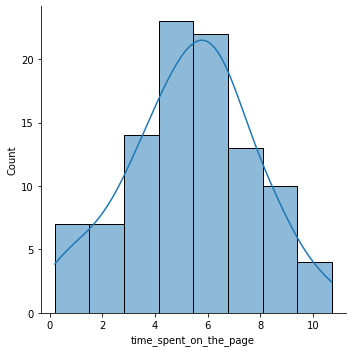

In [ ]:
#returns a plot of the distribution of time spent on landing page for the 100 samples in our data set
sns.displot(data=data,x='time_spent_on_the_page', kde = True);

The distribution plot of time spent on the landing page resembles a normal distribution; however, further statistical analysis is required to determine how similar this distribution is to a normal distribution. 

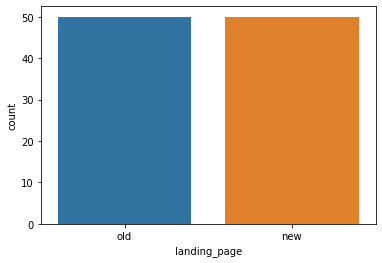

In [ ]:
#returns a countplot of the number of samples for each landing page (old or new)
sns.countplot(data=data, x='landing_page');

We can see that there is an equal count of 50 in each category.

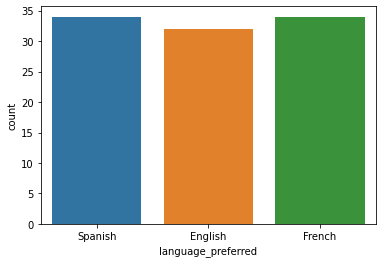

In [ ]:
#returns a countplot of the various preferred languages for each user in the sample 
sns.countplot(data=data, x='language_preferred');

The count for all preferred languages is similar, where all 3 are within the range of 30-35.

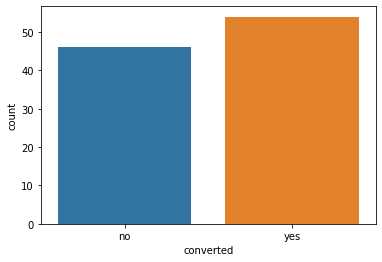

In [ ]:
#returns a countplot of the total number of users who subscribed to the e-news product (converted)
sns.countplot(data=data, x='converted');

Just over half of the users in our sample made the decision to subscribe to the product.

### Bivariate Analysis

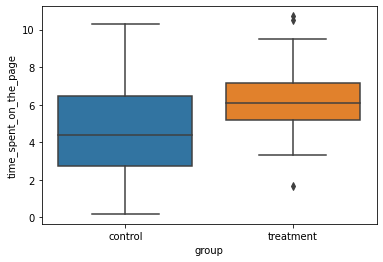

In [ ]:
#returns a box plot comparing the control and treatment group in regards to time spent on the landing page
sns.boxplot(data=data, x='group', y = 'time_spent_on_the_page');

We can see the median time spent on the landing page for the treatment group is higher than that of the control group. More statistical analysis is required to determine if this difference is statistically significant.

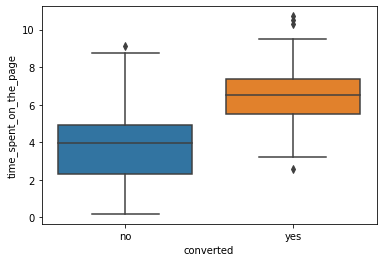

In [ ]:
#returns a box plot comparing 'converted' and 'non-converted' users in regards to time spent on the landing page
sns.boxplot(data=data, x='converted', y = 'time_spent_on_the_page');

We can see the median time spent on the landing page for converted group is greater than that of the 'non-converted' group. More statistical analysis is required to determine if this difference is statistically significant. Assuming this the difference in these groups is statistically significant, we might conclude that more time spent on the landing page causes a higher chance of conversion.

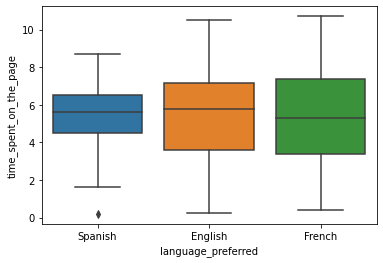

In [ ]:
#returns a box plot comparing Spanish, English and French in regards to time spent on the landing page
sns.boxplot(data=data, x='language_preferred', y = 'time_spent_on_the_page');

The boxplots are similar. Those who prefer Spanish appear to have less variability in time spent on the landing page than the other two; however, more testing is required to determine if this difference is statistically significant.

## 1. Q1 Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

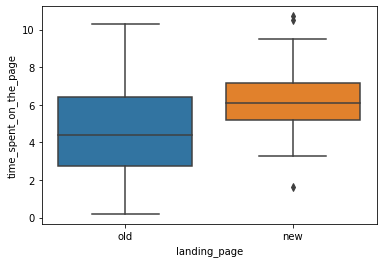

In [ ]:
#returns a box plot comparing time time spent on the old landing page vs the new landing page
sns.boxplot(data=data, x='landing_page', y = 'time_spent_on_the_page');

We can see the median time spent on the new landing page is higher than the time spent on the old landing page; we will perform more statistical testing in order to determine if the difference in means of these groups is statistically significant.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on the landing page for the old and new landing pages, respectively.

>$H_0:\mu_1=\mu_2$

>$H_a:\mu_1<\mu_2$

### Step 2: Select Appropriate test

Since we are comparing the sample means from 2 independent populations and our std devs are unknown, we will be using a 2-sample Independent T-test to analyze our data. Also, based on our alternative hypothesis, our test will be one-tailed.

### Step 3: Decide the significance level

We will set our significance level at α=0.05 as provided in our objective section above.

### Step 4: Collect and prepare data

In [ ]:
#creates seperate data sets separating the old and new landing page groups
data_old = data[data['landing_page'] == 'old'].reset_index().copy()
data_new = data[data['landing_page'] == 'new'].reset_index().copy()


In [ ]:
#prints the means and std devs of the old and new landing page categories
print("Mean of the old landing page in minutes:" , data_old['time_spent_on_the_page'].mean())
print("Mean of the new landing page in minutes:" ,data_new['time_spent_on_the_page'].mean())
print("Standard deviation of the old landing page:" , data_old['time_spent_on_the_page'].std())
print("Standard deviation of the new landing page:" , data_new['time_spent_on_the_page'].std())

Mean of the old landing page in minutes: 4.532400000000001
Mean of the new landing page in minutes: 6.2232
Standard deviation of the old landing page: 2.581974849306046
Standard deviation of the new landing page: 1.8170310387878263


Satisfied 2-sample Independent T-Test Assumptions

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


### Step 5: Calculate the p-value

In [ ]:
#imports the required functions
from scipy.stats import ttest_ind

#finds the p-value
test_stat, p_value = ttest_ind(data_new['time_spent_on_the_page'], data_old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

0.0001392 is less than our $\alpha$ of .05 and therefore we reject our null hypothesis

### Step 7:  Draw inference

Rejecting our null hypothesis allows us to conclude that there is enough statistical evidence to claim that the mean time spent on the new landing page is greater than the time spent on the old landing page.

## 2. Q2 Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

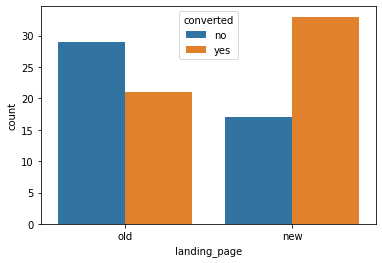

In [ ]:
#returns a count plot comparing conversions of the old and new landing pages
sns.countplot(data=data, x='landing_page', hue='converted');

We can see that greater than half of the users of the old page are not converted. On the contrary, the number of those converted on the new landing page are nearly double the amount of those not converted on the new landing page. We will perform more statistical testing to determine if the difference in conversion rate for these two groups is statistically significant.

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visited the landing page that were converted from the old and new landing page respectively


>$H_0:p_1 =p_2$

>$H_a:p_1 < p_2$

### Step 2: Select Appropriate test

Since we are comparing the sample
proportions from two populations, we will be using a 2-propotion Z-test. Also, based on our alternative hypothesis, our test will be one-tailed.

### Step 3: Decide the significance level

We will set our significance level at α=0.05 as provided in our objective section above.

### Step 4: Collect and prepare data

In [ ]:
#prints the number of converted individuals on the old and new landing pages
print((data_old['converted'] == 'yes').value_counts())
print((data_new['converted'] == 'yes').value_counts())

#prints the total number of rows for the old and new groups
print(data_old.shape[0])
print(data_new.shape[0])


False    29
True     21
Name: converted, dtype: int64
True     33
False    17
Name: converted, dtype: int64
50
50


In [ ]:
#prints calculations of the proportion converted for the old and new landing pages
print('Proportion converted of the old landing page:', (data_old['converted'] == 'yes').sum()/data_old.shape[0])
print('Proportion converted of the new landing page:',(data_new['converted'] == 'yes').sum()/data_new.shape[0])

Proportion converted of the old landing page: 0.42
Proportion converted of the new landing page: 0.66


Satisfied Two Proportion Z-test Assumptions:

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes, np and n(1-p) are greater than or equal to 10 (n and p refer to the sample size and sample proportion respectively).
>$np_1 = 50\cdot 0.42 =21 \geq 10\\
n(1-p_1) = 50 \cdot 0.58 =29 \geq 10 \\
np_2 = 50 \cdot 0.66 =33 \geq 10\\
n(1-p_2) = 50 \cdot 0.34 =17 \geq 10 $

### Step 5: Calculate the p-value

In [ ]:
#imports the required function
from statsmodels.stats.proportion import proportions_ztest

#sets the counts of number of converted users
converted_count = np.array([33, 21])

#sets the sample sizes
nobs = np.array([50, 50])

#finds the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 6: Compare the p-value with $\alpha$

0.008026 is less than our $\alpha$ of .05 and therefore we reject our null hypothesis

### Step 7:  Draw inference

Rejecting our null hypothesis allows us to conclude that there is enough statistical evidence to claim that the proportion of users converted on the new landing page is higher than the proportion of users converted on the old landing page.

## 3. Q3 Are the 'converted' and 'language_preferred' variables independent or related?

### Perform Visual Analysis

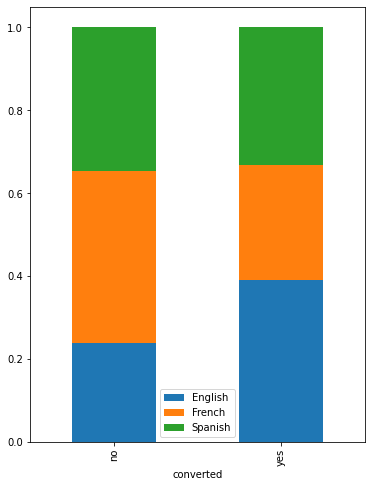

In [ ]:
#returns a plot comparing conversions for the various language preferences of the users
pd.crosstab(data['converted'], data['language_preferred'], normalize = 'index').plot(kind='bar', figsize = (6,8), stacked = True)
plt.legend()
plt.show()

We can see a difference in the distribution of conversions for each language preference of our users; however, we will perform more statistical testing to determine if the 'converted' and 'language_preferred' variables are independent or related.

### Step 1: Define the null and alternate hypotheses

>$H_0:$ Conversion status is independent of language preference.

>$H_a:$ Conversion status depends on language preference.

### Step 2: Select Appropriate test

Since we are checking whether two categorical
variables from a population are
independent, we will be using a Chi-Square Test of Independence

### Step 3: Decide the significance level

We will set our significance level at α=0.05 as provided in our objective section above.

### Step 4: Collect and prepare data

In [ ]:
#returns a cross-tabulation table of the conversion and language preference data
language_conversion_table = pd.crosstab(index=data['language_preferred'], columns=data['converted'])
language_conversion_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Satisfied Chi-Square Test of Independence Assumptions:

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 5: Calculate the p-value

In [ ]:
#imports the required function
from scipy.stats import chi2_contingency

#finds the p-value
chi, p_value, dof, expected = chi2_contingency(language_conversion_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

0.21299 is greater than our $\alpha$ of .05 and therefore we fail to reject our null hypothesis

### Step 7:  Draw inference

Failing to reject our null hypothesis means that we do not have enough statistical evidence to conclude that the conversion status depends on language preference. Thus we assume that conversion status is independent of language preference.

## 4. Q4 Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

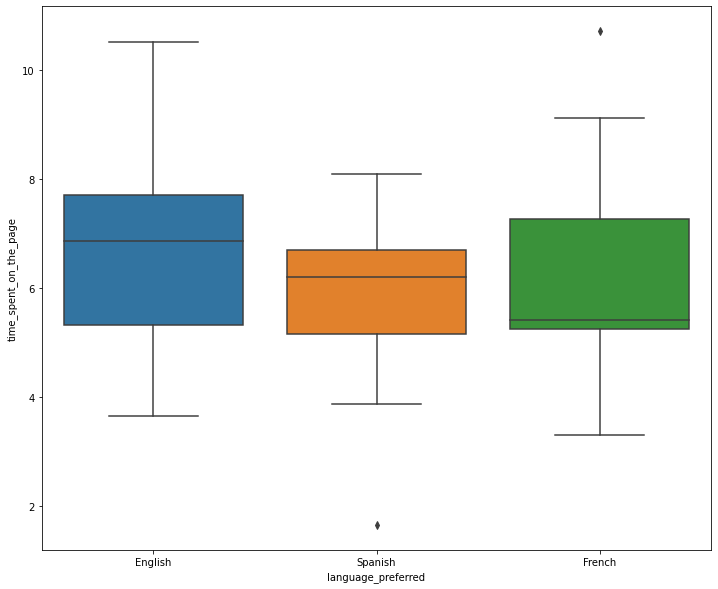

In [ ]:
#returns a box plot comparing time spent on the new landing page for the different language users
plt.figure(figsize=(12,10))
sns.boxplot(data=data_new, x='language_preferred', y='time_spent_on_the_page');

We can see that the median time spent on the new landing page is greatest for English preference, followed by Spanish preference, followed by French preference. More statistical testing will be performed to determine if the differences in means for these three groups are statistically significant.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the mean times spent on the new landing page for languages English, Spanish and French respectively.


>$H_0: \mu_1 = \mu_2 = \mu_3$


>$H_a: $ At least one mean time spent on the new landing page is different from the rest.

### Step 2: Select Appropriate test

Since we are comparing the sample means from 2 or more
independent populations, we will be using a One-way ANOVA test.

### Step 3: Decide the significance level

We will set our significance level at α=0.05 as provided in our objective section above.

### Step 4: Collect and prepare data

### Shapiro-Wilk’s test

>$H_0:$ Time spent on the page follows a normal distribution


>$H_a:$ Time spent on the page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(data['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since our p-value of 0.564 is greater than our significance level of 0.05, we fail to reject our null hypothesis and therefore assume normal distribution.

### Levene’s test


>$H_0$: All the population variances are equal


>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene(data['time_spent_on_the_page'][data['language_preferred']=="English"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="Spanish"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since our p-value of 0.0652 is greater than our significance level of 0.05, we fail to reject our null hypothesis and therefore assume equal variances of our populations.

### Verified One-way ANOVA assumptions:

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.

In [ ]:
#creates 3 different data frames with each consisting of time spent on the new landing page for the different language preferences
data_new_english = data_new[data_new['language_preferred'] == 'English']['time_spent_on_the_page']
data_new_spanish = data_new[data_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']
data_new_french = data_new[data_new['language_preferred'] == 'French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new_english, data_new_spanish, data_new_french)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

0.4320 is greater than our $\alpha$ of .05 and therefore we fail to reject our null hypothesis

### Step 7:  Draw inference

Failing to reject our null hypothesis means that we do not have enough statistical evidence to conclude that at least one mean time spent on the new landing page for language preference is different than the rest. Thus we assume that the mean time spent on the new landing page is the same for all language preferences.

## Conclusion and Business Recommendations

### Conclusions:
* According to our data, mean time spent on the new landing page is greater than that of the older landing page.
* According to our data, the proportion of users converted on the new landing page is greater than that of the old landing page.
* According to our data, language preference and conversion appear to be independent variables
* According to our data, average time spent on the new landing page is approximately the same for the different language preference users.

### Recommendations:


* E-news Express should look into additional methods to further increase time spent on the landing page for users as this will likely generate a greater number of subscribers
* E-news Express should certainly implement the new landing page as we can be confident that this would increase the number of subscribers
* E-news Express should at this stage not make any business decisions in regards to the preferred languages of it's users because language preference appears to have no significant impact on conversion rate.
* E-news Express should consider performing more detailed A/B testing with the new landing page in order to determine which specific features of the new landing page were most effective in increasing conversion (determine specifically what it was about the new landing page that made it so appealing). This information will help E-news Express know which aspects of the website to spend the most amount of time on going forward to further increase revenue.
* Lastly, E-news Express should consider continued sampling of users and their language preferences going forward. As the company grows, there may develop a significant difference between users of different language preferences in regards to other variables. This information can then be used to increase the conversion and retention rates of subscriptions for different users.

___

In [ ]:
!jupyter nbconvert --to html /content/Klussmann_ENews_StatisticalAnalysis.ipynb

[NbConvertApp] WARNING | pattern '/content/Klussmann_ENews_StatisticalAnalysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterA